# About the project

In this project we have a dataset of cars with their different features. Using this dataset we build a machine learning model which will predict the Carbon Dioxide(CO2) emission of thr car. We will use linear regression to build the model. Let's get started and import necessary tools.

In [40]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [31]:
# Importing essential tools required to build the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# The Dataset

Let's read our data set

In [177]:
# Reading the dataset
df=pd.read_csv('D:\Data Science\IBM Data Science\Machine Learning\FuelConsumptionCo2.csv')

#The dataset is available at the following website:
# "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

Check the shape of datset

In [20]:
# shape of the data frame
df.shape

(1067, 13)

Le's see what are the columns

In [5]:
# columns of the data set
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

Let's understand our dataset

Viewing the first few rows of our dataset.

In [4]:
# Viewing the dataset
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's see a description of the dataset.

In [8]:
# description of a dataframe
df.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


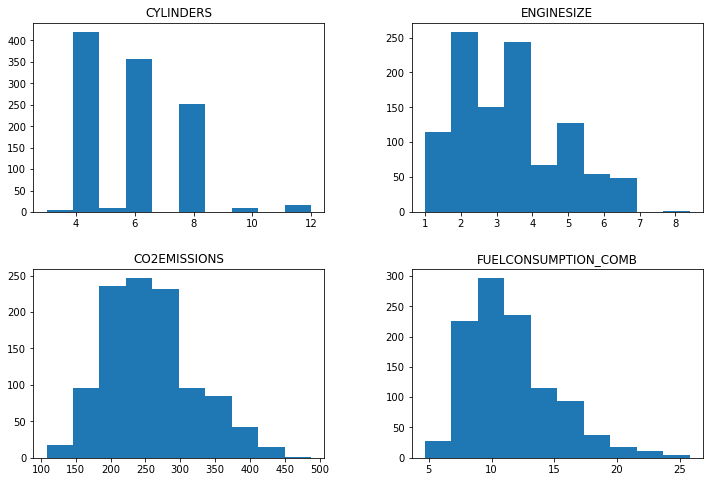

In [19]:
viz=df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist(figsize=(12,8),grid=False)
plt.show()

Let's compare CO2 Emissions for different fuel type

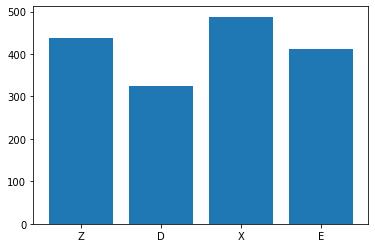

In [117]:

plt.bar(x=df['FUELTYPE'],height=df['CO2EMISSIONS'])
plt.show()

We see that if the fuel type is gasoline then the CO2 Emission is high. The CO2 is emission is comparatively lower for Dieslel cars. We would like to build our model with including fuel type as a feature. As this feature is currently a categorical feature so we turn them into numerical features.

In [149]:
dummies_fuel_type=pd.get_dummies(df['FUELTYPE'])
dummies_fuel_type

,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
1062,0,0,1,0
1063,0,0,1,0
1064,0,0,1,0
1065,0,0,1,0


We add the features to our data.

In [151]:
df[['D','E',"X","Z"]]=dummies_fuel_type
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,D,E,X,Z
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0,0,1
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0,0,1
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0,0,1
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,0,0,1
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271,0,0,1,0
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264,0,0,1,0
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271,0,0,1,0
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260,0,0,1,0


## Checking which features have linear relationship with the dependent variable

Checking linear relationship between engine size and CO2 emission

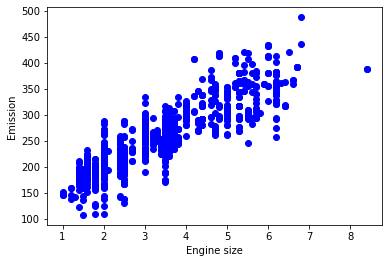

In [22]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Indeed we have a strong relationship between engine size of a car and CO2 emission. Now we check linear relationship between CO2 emission and different fuel consumption ratings.

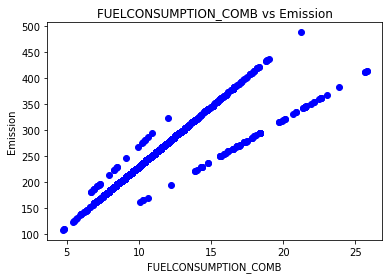

In [172]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.title('FUELCONSUMPTION_COMB vs Emission')
plt.show()

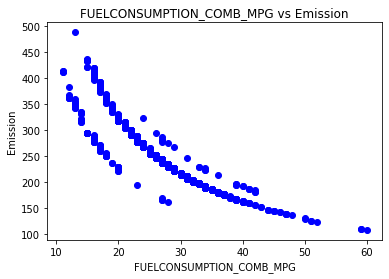

In [176]:
plt.scatter(df.FUELCONSUMPTION_COMB_MPG, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.title('FUELCONSUMPTION_COMB_MPG vs Emission')
plt.show()

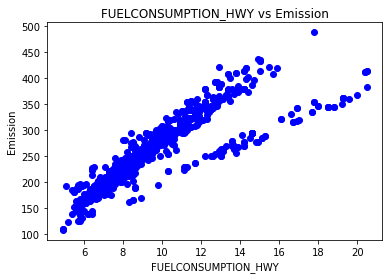

In [173]:
plt.scatter(df.FUELCONSUMPTION_HWY, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")
plt.title('FUELCONSUMPTION_HWY vs Emission')
plt.show()

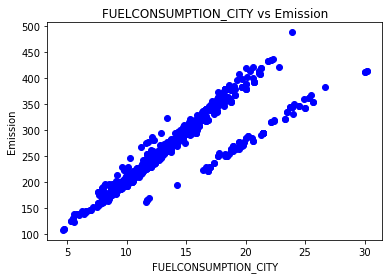

In [174]:
plt.scatter(df.FUELCONSUMPTION_CITY, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.title('FUELCONSUMPTION_CITY vs Emission')
plt.show()

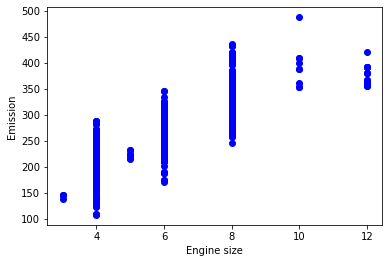

In [23]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Selecting dependent variables and independent variables

In [153]:
dependent_variable='CO2EMISSIONS'
independent_variables=['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','D','E','X','Z']
X=df[independent_variables]
y=df[dependent_variable]

In [154]:
X

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,D,E,X,Z
0,4,2.0,8.5,33,9.9,6.7,0,0,0,1
1,4,2.4,9.6,29,11.2,7.7,0,0,0,1
2,4,1.5,5.9,48,6.0,5.8,0,0,0,1
3,6,3.5,11.1,25,12.7,9.1,0,0,0,1
4,6,3.5,10.6,27,12.1,8.7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1062,6,3.0,11.8,24,13.4,9.8,0,0,1,0
1063,6,3.2,11.5,25,13.2,9.5,0,0,1,0
1064,6,3.0,11.8,24,13.4,9.8,0,0,1,0
1065,6,3.2,11.3,25,12.9,9.3,0,0,1,0


In [155]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [157]:
regr=LinearRegression()
regr.fit(X_train,y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [  1.71635222   0.43261602  28.07807604  -1.70214876  -6.06095215
  -4.56408077  52.31005438 -89.75287722  19.36653599  18.07628685]
Intercept:  78.20781965704336


## Evaluation of the model

In [158]:
y_pred_train=regr.predict(X_train)

In [159]:
y_pred_train[0:10]

array([290.72284686, 344.08300376, 246.72094177, 219.52700914,
       169.1178401 , 272.94024722, 382.11246652, 130.62101221,
       218.61920054, 198.52722197])

In [160]:
y_train[0:10]

270     290
1006    347
728     244
992     218
702     170
747     267
941     389
342     138
944     218
315     198
Name: CO2EMISSIONS, dtype: int64

In [ ]:
y_pred=regr.predict(X_test)

In [162]:
y_test[0:10]

766    356
204    209
629    230
897    212
711    168
108    292
319    212
890    276
320    202
545    334
Name: CO2EMISSIONS, dtype: int64

In [163]:
y_pred[0:10]

array([351.10234603, 211.26413627, 231.62191328, 214.67558547,
       166.56675779, 295.42045403, 212.5530325 , 275.6988148 ,
       204.32607457, 332.04491374])

In [164]:
mean_squared_error(y_test, y_pred)

27.48393952876025

In [165]:
# Train performance
(mean_squared_error(y_train, y_pred_train))

30.311516860658354

In [169]:
# Test Performance
(mean_squared_error(y_test, y_pred))**(1/2)

5.242512711358958

In [167]:
#r2 for train
r2_score(y_train, y_pred_train)

0.9923273890378729

In [168]:
#r2 for test
r2_score(y_test, y_pred)

0.9934895098739644